In [2]:
import numpy as np
from scipy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#I couldn't find the pattern, if any, and wrote the transitions explicitly
transition = np.array([[1, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 0, 2, 1, 1],
                       [0, 0, 2, 0, 0, 0], [0, 1, 0, 0, 1, 0], [1, 1, 1, 1, 1, 1]])
normalizer = np.sum(transition, axis=0)
transition = np.true_divide(transition, normalizer)

#for a transition kernel A, suppose x is an invariant distribution, i.e. Ax = x.
#Then 1 is an eigenvalue, and x the corresponding (family of) eigenvector(s). 
#With its elements summing up to 1, this eigenvector is an invariant distribution
Lambda, X_l, X = LA.eig(transition, left = True)
stationary = np.true_divide(X[:, 0], np.sum(X[:, 0]))

$\[1,1, ... 1]$ is always a left eigenvector corresponding to $\lambda = 1$, 
since a column of the transition matrix sums up to 1.

1 is the largest eigenvalue of the transition matrix. $A$ can be written as the sum of rank-1 matrices obtained by the outer products of left and right eigenvectors, scaled by the corresponding eigenvalues. As we take powers, the effect of eigenvectors corresponding to $\mid\lambda_i\mid<1$ diminish, and $A^k$ gets closer to the rank-1 matrix with all columns equal to the eigenvector corresponding to the eigenvalue 1 (since the corresponding left eigenvector is all 1s), which makes this invariant distribution stationary. 

Convergence is then determined by how fast the second largest eigenvalue approaches to 0 as we take its powers.



In [4]:
#the eigenvector
print(stationary)
#verification
print(np.linalg.matrix_power(transition, 50)[:, 3])
#The second largest eigenvalue
print np.abs(Lambda[1])
#The left eigenvector corresponding to lambda = 1, [c, c, ..., c]
print X_l[:, 0]

[ 0.08333333  0.25        0.22222222  0.11111111  0.08333333  0.25      ]
[ 0.08333333  0.25        0.22222222  0.11111111  0.08333333  0.25      ]
0.5
[ 0.40824829  0.40824829  0.40824829  0.40824829  0.40824829  0.40824829]


In [5]:
x0 = np.array([1, 0, 0, 0, 0, 0])
def tvn(X_right, X_left, Lambda, p):
    return np.linalg.norm(np.dot(np.dot(X_right[:, 1:] * np.abs(np.power(Lambda[1:], p)), 
                                        X_left[:, 1:].T) , x0), 1)

#Total variation norm
epsilon = 1e-8
t_mix = next(p for p in range(1, 1000) if tvn(X, X_l, Lambda, p) <= epsilon)
print t_mix

25


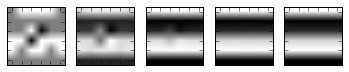

In [6]:
pows = [1, 3, 5, 10, 25]
for (i, p) in enumerate(pows, start=1):
    pl = plt.subplot(1, 5, i)
    plt.imshow(np.linalg.matrix_power(transition, p), cmap='gray_r')
    pl.axes.xaxis.set_ticklabels([])
    pl.axes.yaxis.set_ticklabels([])

[ 0.08333333  0.25        0.22222222  0.11111111  0.08333333  0.25      ]
[ 0.075  0.252  0.228  0.114  0.087  0.244]

[]

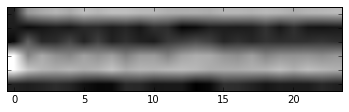

In [7]:
def next_x(cdf, x_t):
    return [np.digitize(np.random.sample(1), cdf[:, x])[0] for x in x_t]

T = t_mix
cdf = np.dot(np.tril(np.ones(6)), transition)
print stationary
samples = []
f = [0 for i in range(1000)]   
samples.append(f)

for t in range(1, T):
   samples.append(next_x(cdf, samples[t-1]))

#not showing t = 1 for visual convenience
s = np.apply_along_axis(
    lambda x: np.histogram(x, bins = [0,1,2,3,4,5,6], density=True)[0],
    0, np.array(samples).T[:, 1:])

print(s[:, T-2])

pl = plt.imshow(s, cmap = 'gray_r')
pl.axes.yaxis.set_ticklabels([])

[ 0.08333333  0.25        0.22222222  0.11111111  0.08333333  0.25      ]
[ 0.0857  0.2516  0.2182  0.1096  0.0821  0.2528]


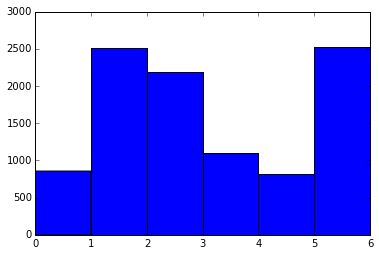

In [8]:
T = 10000
cdf = np.dot(np.tril(np.ones(6)), transition)
samples = [0]

for t in range(1, T):
   samples.append(next_x(cdf, [samples[t-1]])[0])
s = np.histogram(np.array(samples), bins = [0,1,2,3,4,5,6], density = True)[0]

print stationary
print s
pl = plt.hist(np.array(samples), bins = np.arange(0, 7))